## Repaso pivot table
Poner categorias de columnas, como nuevas filas o columnas

```Python
df.pivot_table(values, index, columns)
```

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Todos los que sobrevivieron por sexo y clase

In [2]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


Todos los que sobrevivieron por sexo y clase

Tarifas por sexo y clase

Comparando survived vs fare.

In [3]:
df = titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':sum, 'fare':'mean'})
df

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [4]:
df.survived

class,First,Second,Third
sex,,,
female,91,70,72
male,45,17,47


In [9]:
df.fare

class,First,Second,Third
sex,,,
female,106.125798,21.970121,16.118810
male,67.226127,19.741782,12.661633


Por sexo, la media de edad y de fare

In [16]:
titanic.pivot_table(index='sex', values=['age', 'fare'],
                    aggfunc={'age':sum, 'fare':'mean'})

,age,fare
sex,,
female,7286.00,44.479818
male,13919.17,25.523893


## Birthdays data

In [5]:
births = pd.read_csv('data/births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


Todos los cumpleaños por sexo y decada

In [9]:
births['year'] // 10

0        196
1        196
2        196
3        196
4        196
        ... 
15542    200
15543    200
15544    200
15545    200
15546    200
Name: year, Length: 15547, dtype: int64

In [19]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table(values='births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


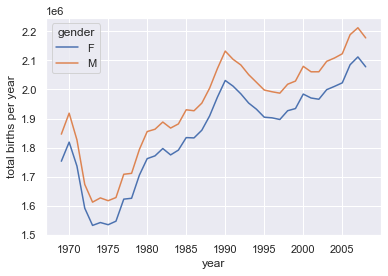

In [22]:
import matplotlib.pyplot as plt
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

## Melt
https://towardsdatascience.com/reshape-pandas-dataframe-with-melt-in-python-tutorial-and-visualization-29ec1450bb02

In [23]:
import pandas as pd

df_wide = pd.DataFrame(
  {"student": ["Andy", "Bernie", "Cindy", "Deb"],
   "school":  ["Z", "Y", "Z", "Y"],
   "english": [10, 100, 1000, 10000],  # eng grades
   "math":    [20, 200, 2000, 20000],  # math grades
   "physics": [30, 300, 3000, 30000]   # physics grades
  }
)
df_wide

,student,school,english,math,physics
0,Andy,Z,10,20,30
1,Bernie,Y,100,200,300
2,Cindy,Z,1000,2000,3000
3,Deb,Y,10000,20000,30000


Queremos pasar todos los valores de english, math y physics a una sola columna, y que vengan identificados los valores por otra más de tipo categórica, que me indique a qué columna pertenecen.
```Python
df_wide.melt(id_vars,
             var_name,
             value_name)
```
id_vars son las columnas a conservar

var_name: cómo se llama la columna que me identifica la columna a la que pertenece el dato

value_name: todos los datos pasan a una única columna. Nombre de esa columna.

In [24]:
df_wide.melt(id_vars=["student", "school"],
             var_name="cLaSs",
             value_name="gRaDe")

,student,school,cLaSs,gRaDe
0,Andy,Z,english,10
1,Bernie,Y,english,100
2,Cindy,Z,english,1000
3,Deb,Y,english,10000
4,Andy,Z,math,20
5,Bernie,Y,math,200
6,Cindy,Z,math,2000
7,Deb,Y,math,20000
8,Andy,Z,physics,30
9,Bernie,Y,physics,300


Si queremos ignorar algunas columnas

In [26]:
df_wide.head()

,student,school,english,math,physics
0,Andy,Z,10,20,30
1,Bernie,Y,100,200,300
2,Cindy,Z,1000,2000,3000
3,Deb,Y,10000,20000,30000


In [25]:
df_wide.melt(id_vars="student", 
             value_vars=["english", "math"], 
             var_name="cLaSs",  # rename
             value_name="gRaDe")  # rename

,student,cLaSs,gRaDe
0,Andy,english,10
1,Bernie,english,100
2,Cindy,english,1000
3,Deb,english,10000
4,Andy,math,20
5,Bernie,math,200
6,Cindy,math,2000
7,Deb,math,20000


Lo hacemos para todas las columnas

In [27]:
df_wide.melt(id_vars="student",
             var_name="cLaSs",  # rename
             value_name="gRaDe")  # rename

,student,cLaSs,gRaDe
0,Andy,school,Z
1,Bernie,school,Y
2,Cindy,school,Z
3,Deb,school,Y
4,Andy,english,10
5,Bernie,english,100
6,Cindy,english,1000
7,Deb,english,10000
8,Andy,math,20
9,Bernie,math,200


In [32]:
df = df_wide.melt(id_vars="student",
             var_name="cLaSs",  # rename
             value_name="gRaDe")  # rename

df.pivot_table(values='gRaDe', index='student', columns='cLaSs', aggfunc='sum')

cLaSs,english,math,physics,school
student,,,,
Andy,10,20,30,Z
Bernie,100,200,300,Y
Cindy,1000,2000,3000,Z
Deb,10000,20000,30000,Y
